# Lab 5: Perceptual modeling
Explore different perceptual masking topics used in audio coding.

## References:

### Bark scale
The Bark scale is a perceptual scale that divides the audible frequency range into critical bands, based on how the human ear perceives sound. 

### Critical bands
The Bark scale divides the audible frequency spectrum (roughly 20 Hz to 20,000 Hz) into 24 critical bands. Each critical band corresponds to a range of frequencies that the human ear processes as a single unit. Within a critical band, multiple sound frequencies can interact, leading to auditory masking (one sound making another sound less audible).

### Masking threshold in quiet
The masking threshold in quiet refers to the minimum sound intensity level at a specific frequency that is audible to the human ear in a quiet environment, with no background noise. This threshold is important in psychoacoustics, as it defines the point at which a sound becomes detectable by a listener in an ideal, quiet setting.

### Frequency masking
Frequency masking is a psychoacoustic phenomenon where a louder sound at a certain frequency makes it difficult or impossible to hear a quieter sound at a nearby frequency. Essentially, when two sounds occur simultaneously but at different frequencies, the louder sound can "mask" or cover up the quieter one, especially if they are close in frequency. This effect plays a crucial role in how humans perceive complex sound environments.

### Spreading function
The spreading function refers to a model used in psychoacoustics to describe how masking effects spread across frequencies. It quantifies how the influence of a louder sound at a specific frequency spreads and affects the perception of quieter sounds across nearby frequencies. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import read
import scipy.signal as signal
from scipy.fftpack import fft, ifft


## Part 1 - Bark Scale

explore the Bark scale. Answer the questions given and modify the code as needed to support your answers.

In [13]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 2))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate, normalize=False))

# Define the Bark scale conversion function
def hz2bark(f):
    """ Usage: Bark=hz2bark(f)
    f    : (ndarray)    Array containing frequencies in Hz.
    Returns  :
    Brk  : (ndarray)    Array containing Bark scaled values.
    """
    Brk = 6. * np.arcsinh(f/600.)
    return Brk

def bark2hz(Brk):
    """ Usage:
    Hz=bark2hs(Brk)
    Args     :
        Brk  : (ndarray)    Array containing Bark scaled values.
    Returns  :
        Fhz  : (ndarray)    Array containing frequencies in Hz.
    """

    Fhz = 600. * np.sinh(Brk/6.)
    return Fhz

C:\Users\alexp\AppData\Local\Temp\ipykernel_18328\2178366903.py:36: RuntimeWarning: divide by zero encountered in log2
  plt.plot(np.log2(frequency_indexes), magnitude_spectrum)


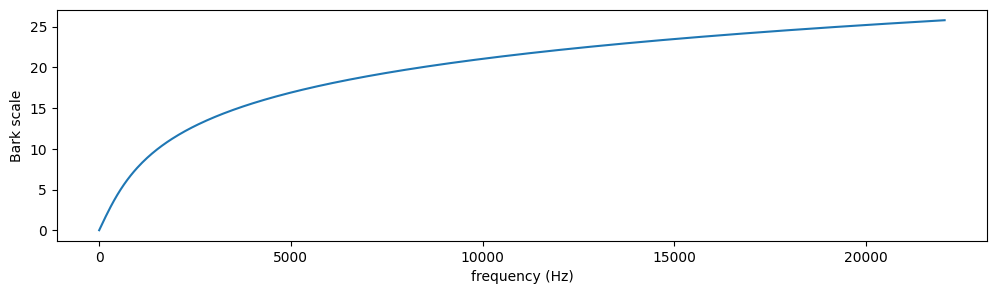

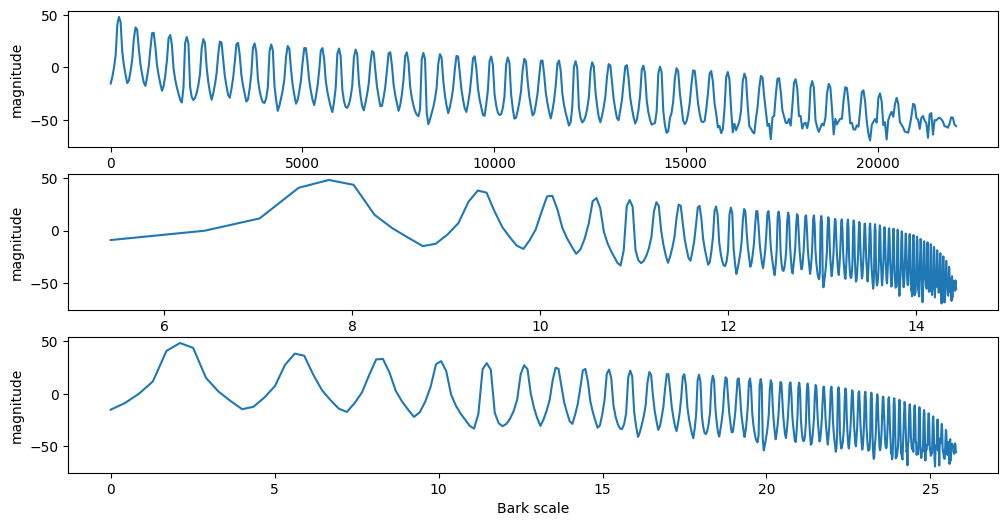

In [14]:
# compute and plot the bark scale

freqs = np.linspace(0,22050,512)
bark_scale = hz2bark(freqs)

# Plot the Bark scale
plt.figure(figsize=(12, 3))
plt.plot(freqs, bark_scale)
plt.xlabel("frequency (Hz)")
plt.ylabel("Bark scale")

# plot the magnitude spectrum of a sound in the bark scale
x, fs = read_sound('../sounds/synthetic.wav')
N = 1024
x1 = x[10000:10000+N]

# compute the hanning window
w = signal.get_window('hann', N)
# compute the spectrum of the windowed input signal
spectrum = fft(w*x1)
# compute the magnitude spectrum in dB
magnitude_spectrum = 20*np.log10(abs(spectrum[:N//2]))

# Plot the original FFT and the Bark scale spectrum
plt.figure(figsize=(12, 6))

bark_scale = hz2bark(freqs)

plt.subplot(3, 1, 1)
frequency_indexes = np.linspace(0, fs/2, N//2)
plt.plot(frequency_indexes, magnitude_spectrum)
plt.xlabel("linear frequency (Hz)")
plt.ylabel("magnitude")

plt.subplot(3, 1, 2)
plt.plot(np.log2(frequency_indexes), magnitude_spectrum)
plt.xlabel("logarithmic-scale frequency (Hz)")
plt.ylabel("magnitude")

plt.subplot(3, 1, 3)
plt.plot(bark_scale, magnitude_spectrum)
plt.xlabel("Bark scale")
plt.ylabel("magnitude")

plt.show()

**Questions:**

**1. Compute and show the magnitude spectrum of a sound (choose any sound), with different frequency axis, in particular, linear frequency, logarithmic frequency, and using the bark scale. Describe the differences and explain possible advantages and disadvantages of each representation for general audio processing applications.**
___

In the linear frequency scale, the harmonics of sounds are spaced linearly, making it a straightforward and simple visualization. This representation is useful for understanding the direct relationship between frequency and amplitude, but it doesn't align well with how humans perceive sound.

The Bark scale, on the other hand, is more suited for analysis related to human hearing. It provides a representation where the harmonics of sounds are more evenly spaced, which corresponds better to how the ear processes different frequencies. However, it may sacrifice some detail in the higher frequencies due to the way the human ear is less sensitive in those ranges.

## Part 2 - Masking threshold of quiet

Explore the masking threshold of quiet, answer the questions given and modify the code as needed to support the answers.

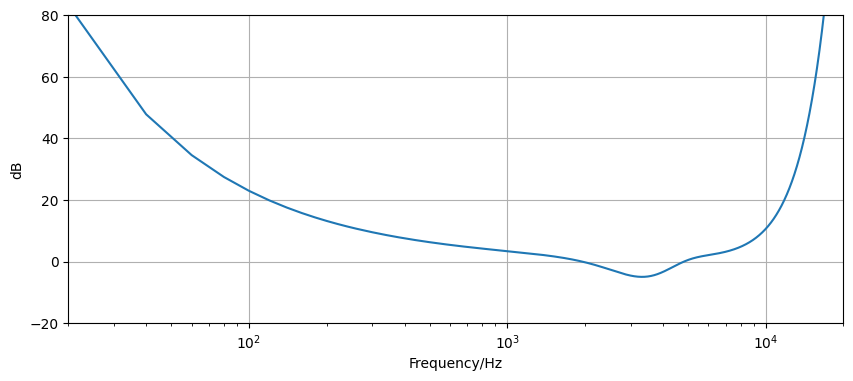

In [15]:
# compute and display the the threshold curve of quiet

f=np.linspace(20,20000,1000)
LTQ=3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)
plt.figure(figsize=(10,4))
plt.semilogx(f,LTQ)
plt.axis([20,20000, -20,80])
plt.xlabel('Frequency/Hz')
plt.ylabel('dB')
plt.grid()

frequency response (sensitivity) of the ear-->reverse the plot

C:\Users\alexp\AppData\Local\Temp\ipykernel_18328\2925751355.py:5: RuntimeWarning: divide by zero encountered in power
  LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)


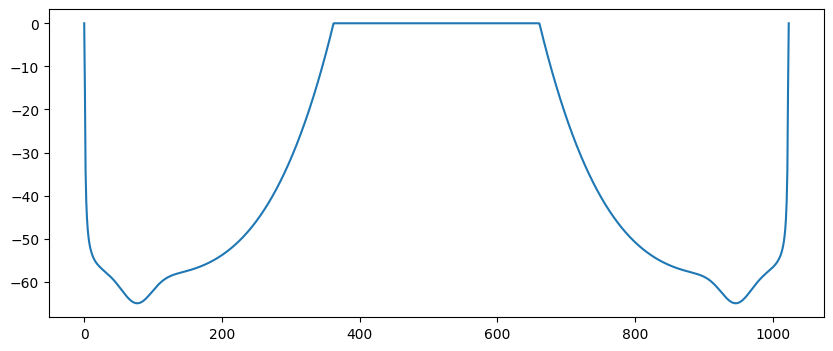

In [16]:
# adapt the magnitude threshold of quiet to a curve to be used in a spectrum
fs = 44100    # sampling frequency
N = 1024      # number of subbands
f = np.linspace(0,fs/2, N//2)
LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.- 3.3)**2.)+1e-3*((f/1000.)**4.)),-20,60)
LTQ=np.append(LTQ-60, np.flip(LTQ-60))
plt.figure(figsize=(10,4))
plt.plot(LTQ)

modified hearing threshold to be aplied in the magnitude spectrum

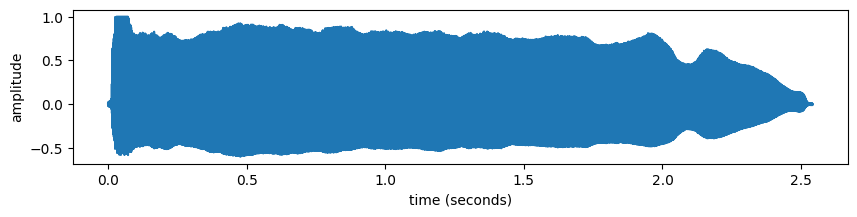

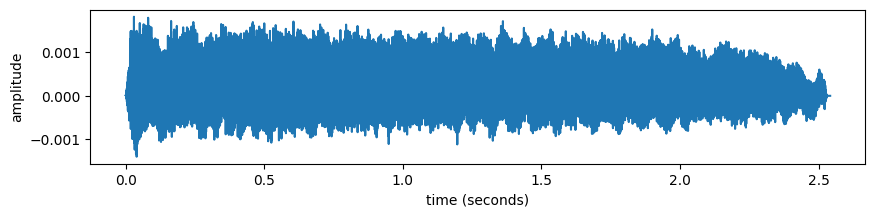

In [17]:
# apply the masking curve of quiet to a sound

x, fs = read_sound('../sounds/487465-trumpet.wav')
x *= 2

y = np.zeros(len(x))

i = 0
while i < x.size-N:
  w = signal.get_window('hann', N)
  xw = x[i:i+N] * w
  X = fft(xw)
  mX = 20 * np.log10(abs(X))
  pX = np.angle(X)

  mX += LTQ
  Y = 10 ** (mX/20) * np.exp(1j * pX)
  yt = np.real(ifft(Y))
  y[i:i+N] += yt
  i += N//2

display_sound(x.clip(-1, 1), fs)
display_sound(y.clip(-1, 1), fs)

**Questions:**

**1. Apply the masking curve in quite to three different sounds with different characteristics (you choose). What do you hear? Does it result in the same effect for all of them? Explain. Support it with some spectral plots.**

White Noise: After applying the masking curve, the output audio is almost inaudible, even though there is visible amplitude in its waveform.

Trumpet: After applying the masking curve, only the high-frequency content remains, and you can hear it faintly if the volume is turned up to maximum.

Background Music: The output contains faint low-frequency noise, but the original musical content is mostly lost.

The masking curve's effect depends on the energy distribution across frequencies in the input sound. White noise, with its evenly distributed energy, is completely masked, while more structured sounds like the trumpet and background music retain some frequency content, those less affected by the masking threshold.

**2. Amplify one of the output sounds by a factor of 2. Any difference? describe.**

After multiplying the sounds by 2 (amplifying), the sound becomes louder but still retains the same characteristics that were present after applying the masking threshold. The masked frequencies remain inaudible.

____

# Part 3 - Frequency masking
Explore frequency masking. Answer the questions given and modify the code as needed to support your answers.

In [18]:
def f_SP_dB(maxfreq,nfilts):
    #usage: spreadingfunctionmatdB=f_SP_dB(maxfreq,nfilts)
    #computes the spreading function protoype, in the Bark scale.
    #Arguments: maxfreq: half the sampling freqency
    #nfilts: Number of subbands in the Bark domain, for instance 64

    maxbark=hz2bark(maxfreq) #upper end of our Bark scale:22 Bark at 16 kHz

    #Number of our Bark scale bands over this range: nfilts=64
    spreadingfunctionBarkdB=np.zeros(2*nfilts)

    #Spreading function prototype, "nfilts" bands for lower slope
    spreadingfunctionBarkdB[0:nfilts]=np.linspace(-maxbark*27,-8,nfilts)-23.5

    #"nfilts" bands for upper slope:
    spreadingfunctionBarkdB[nfilts:2*nfilts]=np.linspace(0,-maxbark*12.0,nfilts)-23.5
    return spreadingfunctionBarkdB

def mapping2bark(mX,W,nfft):
    #Maps (warps) magnitude spectrum vector mX from DFT to the Bark scale
    #arguments: mX: magnitude spectrum from fft
    #W: mapping matrix from function mapping2barkmat
    #nfft: : number of subbands in fft
    #returns: mXbark, magnitude mapped to the Bark scale

    nfreqs= nfft//2

    #Here is the actual mapping, suming up powers and conv. back to Voltages:
    mXbark = (np.dot( np.abs(mX[:nfreqs])**2.0, W[:, :nfreqs].T))**(0.5)

    return mXbark

def mappingfrombark(mTbark,W_inv,nfft):
    #usage: mT=mappingfrombark(mTbark,W_inv,nfft)
    #Maps (warps) magnitude spectrum vector mTbark in the Bark scale
    # back to the linear scale
    #arguments:
    #mTbark: masking threshold in the Bark domain
    #W_inv : inverse mapping matrix W_inv from matrix W for mapping back from bark scale
    #nfft: : number of subbands in fft
    #returns: mT, masking threshold in the linear scale

    nfreqs = nfft//2
    mT = np.dot(mTbark, W_inv[:, :nfreqs].T)
    return mT

def maskingThresholdBark(mXbark,spreadingfuncmatrix,alpha,fs,nfilts):
    #Computes the masking threshold on the Bark scale with non-linear superposition
    #usage: mTbark=maskingThresholdBark(mXbark,spreadingfuncmatrix,alpha)
    #Arg: mXbark: magnitude of FFT spectrum, on the Bark scale
    #spreadingfuncmatrix: spreading function matrix from function spreadingfunctionmat
    #alpha: exponent for non-linear superposition (eg. 0.6),
    #fs: sampling freq., nfilts: number of Bark subbands
    #nfilts: Number of subbands in the Bark domain, for instance 64
    #Returns: mTbark: the resulting Masking Threshold on the Bark scale

    #Compute the non-linear superposition:
    mTbark = np.dot(mXbark**alpha, spreadingfuncmatrix**alpha)

    #apply the inverse exponent to the result:
    mTbark = mTbark**(1.0/alpha)

    #Threshold in quiet:
    maxfreq = fs/2.0
    maxbark = hz2bark(maxfreq)
    step_bark = maxbark/(nfilts-1)
    barks=np.arange(0,nfilts)*step_bark

    #convert the bark subband frequencies to Hz:
    f=bark2hz(barks)+1e-6
    #Threshold of quiet in the Bark subbands in dB:
    LTQ=np.clip((3.64*(f/1000.)**-0.8 -6.5*np.exp(-0.6*(f/1000.-3.3)**2.)+1e-3*((f/1000.)**4.)),-20,160)
    #Maximum of spreading functions and hearing threshold in quiet:
    mTbark=np.max((mTbark, 10.0**((LTQ-60)/20)),0)
    return mTbark

def mapping2barkmat(fs, nfilts, nfft):
  #Constructing matrix W which has 1’s for each Bark subband, and 0’s else:
  #nfft=2048; nfilts=64;
  nfreqs=nfft//2
  maxfreq = fs/2.0
  maxbark = hz2bark(maxfreq)
  step_barks = maxbark/(nfilts-1)
  #the linspace produces an array with the fft band edges:
  binbarks = hz2bark(np.linspace(0,(nfft//2),(nfft//2)+1)*fs/nfft)
  W = np.zeros((nfilts, nfft))
  for i in range(nfilts):
    W[i,0:(nfft//2)+1] = (np.round(binbarks/step_barks)== i)
  return W

def mappingfrombarkmat(W,nfft):
    #Constructing inverse mapping matrix W_inv from matrix W for mapping back from bark scale
    #usuage: W_inv=mappingfrombarkmat(Wnfft)
    #argument: W: mapping matrix from function mapping2barkmat
    #nfft: : number of subbands in fft
    nfreqs=int(nfft/2)
    W_inv= np.dot(np.diag((1.0/np.sum(W,1))**0.5), W[:,0:nfreqs + 1]).T
    return W_inv

def spreadingfunctionmat(spreadingfunctionBarkdB, alpha, nfilts):
    #Turns the spreading prototype function into a matrix of shifted versions.
    #Convert from dB to "voltage" and include alpha exponent
    #nfilts: Number of subbands in the Bark domain, for instance 64
    spreadingfunctionBarkVoltage=10.0**(spreadingfunctionBarkdB/20.0*alpha)

    #Spreading functions for all bark scale bands in a matrix:
    spreadingfuncmatrix=np.zeros((nfilts,nfilts))

    for k in range(nfilts):
        spreadingfuncmatrix[k,:]=spreadingfunctionBarkVoltage[(nfilts-k):(2*nfilts-k)]

    return spreadingfuncmatrix

def display_spectrogram(sound_array, hop_size=256, fft_size=512, sampling_rate=44100):
  """ Display magnitude spectrogram of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      hop_size (int): window hop size
      fft_size (int): Spectrogram fft size
      sampling_rate (int): Sampling rate of sound
  """
  # compute the hanning window
  window = signal.get_window('hann', fft_size)
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(window*sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += hop_size

  # plot the magnitude sspectrogram
  plt.figure(figsize=(10, 5))
  time_indexes = np.arange(0, sample_index/sampling_rate, hop_size/sampling_rate)
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/fft_size)
  plt.pcolormesh(time_indexes, frequency_indexes, np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('time (seconds)')
  plt.ylabel('frequency (Hz)')
  plt.show()


C:\Users\alexp\AppData\Local\Temp\ipykernel_18328\3517019927.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, x = read(file)


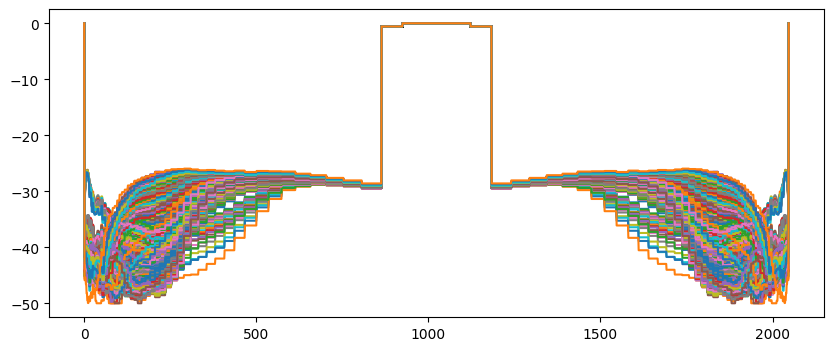

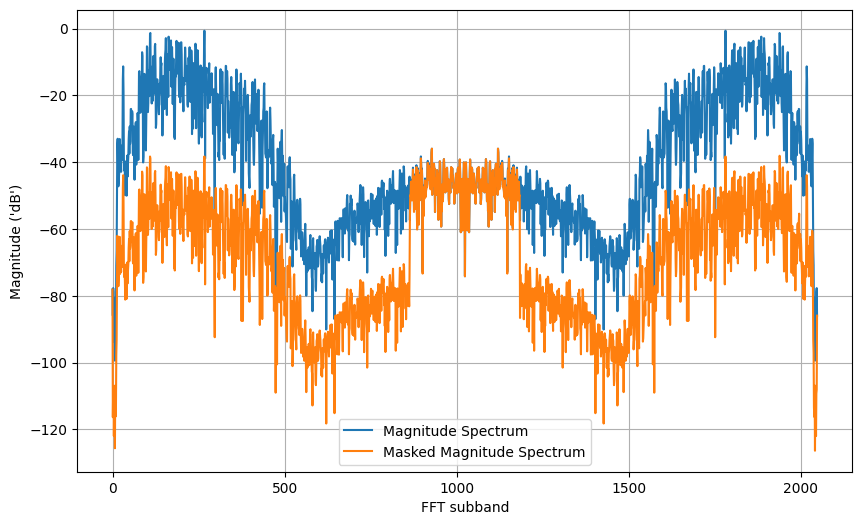

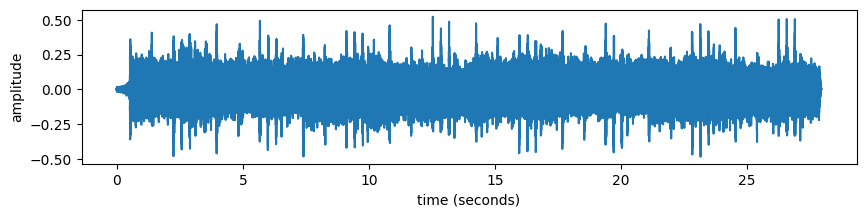

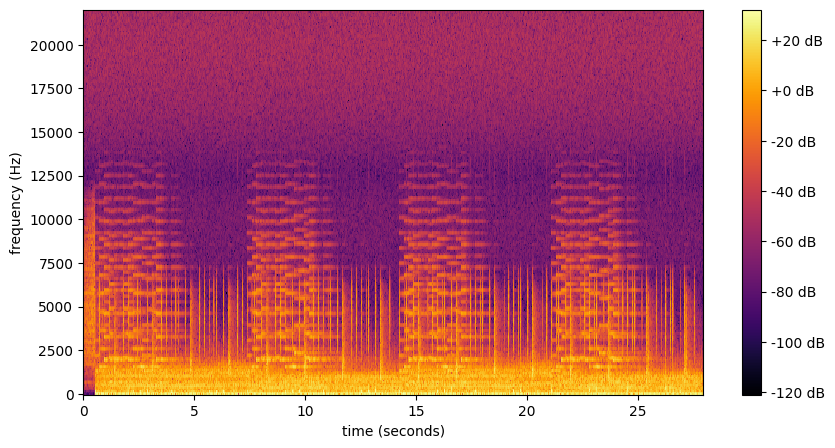

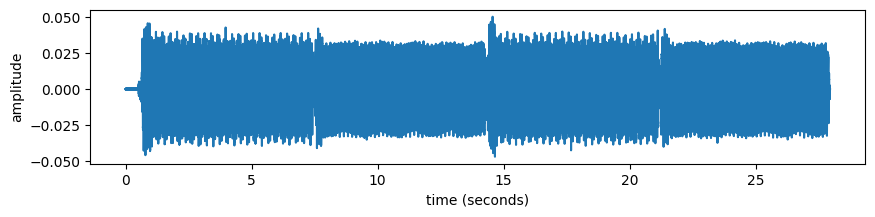

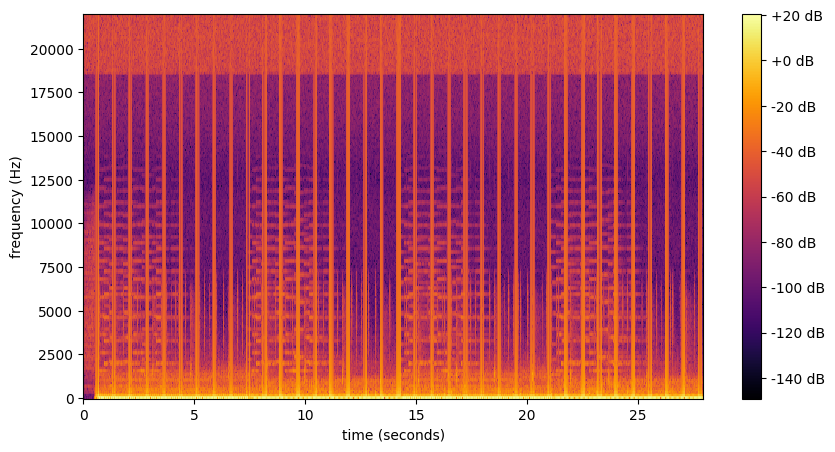

In [19]:
# compute the frequency masking curve for each frame of a sound and subtract it from the sound
x, fs = read_sound('../sounds/750340-background-music.wav')

# compute the 
maxfreq = fs/2
alpha = 0.8 # exponent for non-linear superposition
nfilts = 64
N = 2048
W = mapping2barkmat(fs, nfilts, N)
W_inv = mappingfrombarkmat(W, N)
spreadingfunctionBarkdB=f_SP_dB(maxfreq, nfilts)
spreadingfuncmatrix=spreadingfunctionmat(spreadingfunctionBarkdB, alpha, nfilts)

plt.figure(figsize=(10,4))
y = np.zeros(len(x))

# iterate over the sound
i = 0
while i < x.size-N:
  w = signal.get_window('hann', N)
  xw = x[i:i+N] * w
  X = fft(xw)
  mX = 20 * np.log10(abs(X)) # original magnitude spectrum
  pX = np.angle(X)

  # Compute the Bark scale magnitude spectrum
  mXbark = mapping2bark(mX, W, N)
  # Compute the masking threshold in the Bark domain:
  mTbark =  maskingThresholdBark(mXbark, spreadingfuncmatrix, alpha, fs, nfilts)
  # Masking threshold in the original frequency domain
  mT = 20 * np.log10(mappingfrombark(mTbark, W_inv, N))
  masking_curve = np.append(mT, np.flip(mT[:N//2-1])) - 60
  masking_curve = np.clip(masking_curve,-50,0)
  mX += masking_curve #applying the masking curve
  plt.plot(masking_curve) #mX or masking_curve
  Y = 10 ** (mX/20) * np.exp(1j * pX)
  yt = np.real(ifft(Y))
  y[i:i+N] += yt
  i += N//2


N = 2048
x1 = x[1000:1000+N]

w = signal.get_window('hann', N)
xw = x1 * w
X = fft(xw)
mX = 20 * np.log10(abs(X)) # original magnitude spectrum

# Compute the Bark scale magnitude spectrum
mXbark = mapping2bark(mX, W, N)
# Compute the masking threshold in the Bark domain:
mTbark =  maskingThresholdBark(mXbark, spreadingfuncmatrix, alpha, fs, nfilts)
# Masking threshold in the original frequency domain
mT = 20 * np.log10(mappingfrombark(mTbark, W_inv, N))
masking_curve = np.append(mT, np.flip(mT[:N//2-1])) - 60
masking_curve = np.clip(masking_curve,-50,0)
mXmasked = mX + masking_curve #applying the masking curve

mT = np.clip(mT,-40,0)
plt.figure(figsize=(10,6))
plt.plot(mX)
plt.plot(mXmasked)
plt.legend(('Magnitude Spectrum','Masked Magnitude Spectrum'))
plt.xlabel('FFT subband')
plt.ylabel("Magnitude ('dB')")
plt.grid()

display_sound(x, fs)
display_spectrogram(x)

display_sound(y, fs)
display_spectrogram(y)

**Questions:**

**1. Apply frequency masking to one sound you choose. Compute and display the spectrogram of both the input and output sounds. Superpose, in the same plot, the magnitude spectrum of a particular section of the input sound with the magnitude spectrum of the same time location of the output sound. Explain the difference between the two spectrograms and the two spectra.**

Spectrogram Comparison: The key differences are the regions where frequency masking has occurred. Some portions of the spectrum in the output (masked) have reduced energy due to masking, so they are less bright. There are new frequency components, maybe representing some distortions created after masking.

Superimposed Magnitude Spectrum Comparison: In the masked spectrum, there are reductions in the amplitude of the lower and higher frequency components, while the mid-range of frequencies is preserved.

Waveform comparison: The main difference in the masked output is the reduction of amplitude of the waveform. The shape also differs, altough it is not too diferent.
___